In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import pickle
from google.colab import files
from sklearn.metrics import classification_report

In [2]:
#uploaded = files.upload()

In [3]:
#Carregando arquivo pronto para fazer DataFrame
a_file = open("oDataFrame2.pkl", "rb")
d = pickle.load(a_file)
a_file.close()

In [4]:
#Limpando infos inuteis em relação ao treino
d.pop('INFO4')
d.pop('INFO6')

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,


In [5]:
#criando DataFrame
dt = pd.DataFrame(d)
dt.describe()

,INFO1,INFO2,INFO3,INFO5
count,140725.000000,140725.000000,140725.000000,140725.000000
mean,49.280402,44.181453,53.512495,39.039083
std,46.128578,37.968450,45.702310,43.781575
min,0.000000,0.000000,0.000000,0.000000
25%,20.294211,14.598431,19.000000,0.000000
50%,44.000000,41.000000,47.000000,32.958125
75%,66.000000,56.651458,72.502083,55.255462
max,991.000000,485.000000,607.000000,2500.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f3d7ffe48>,
      dtype=object)

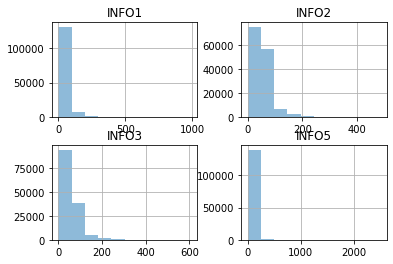

In [6]:
dt.hist(alpha=0.5)

In [7]:
#separando o DataFrame em X e y
X = dt.iloc[:, :-1].values
y = dt.iloc[:, 4].values

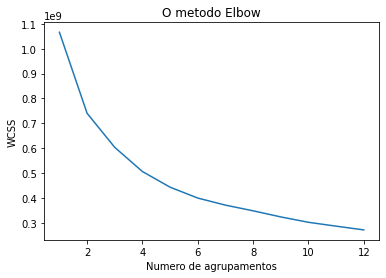

In [8]:
#Fazendo Grafico para descobrir numero de clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 13):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 13), wcss)
plt.title('O metodo Elbow')
plt.xlabel('Numero de agrupamentos')
plt.ylabel('WCSS')
plt.show()

In [14]:
# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[3 3 3 ... 3 3 3]


In [15]:
#Separando novos dados agrupados
d['CLUSTERED'] = pd.Series(y_kmeans, index=dt.index)

sep1 = {'INFO1':[],'INFO2':[],'INFO3':[],'INFO5':[],'ACTIVITY':[]}
sep2 = {'INFO1':[],'INFO2':[],'INFO3':[],'INFO5':[],'ACTIVITY':[]}
sep3 = {'INFO1':[],'INFO2':[],'INFO3':[],'INFO5':[],'ACTIVITY':[]}
sep4 = {'INFO1':[],'INFO2':[],'INFO3':[],'INFO5':[],'ACTIVITY':[]}
sep5 = {'INFO1':[],'INFO2':[],'INFO3':[],'INFO5':[],'ACTIVITY':[]}
sep6 = {'INFO1':[],'INFO2':[],'INFO3':[],'INFO5':[],'ACTIVITY':[]}

for i in range(len(d['CLUSTERED'])):
  if(d['CLUSTERED'][i] == 0):
    sep1['INFO1'].append(d['INFO1'][i])
    sep1['INFO2'].append(d['INFO2'][i])
    sep1['INFO3'].append(d['INFO3'][i])
    sep1['INFO5'].append(d['INFO5'][i])
    sep1['ACTIVITY'].append(d['ACTIVITY'][i])
  elif(d['CLUSTERED'][i] == 1):
    sep2['INFO1'].append(d['INFO1'][i])
    sep2['INFO2'].append(d['INFO2'][i])
    sep2['INFO3'].append(d['INFO3'][i])
    sep2['INFO5'].append(d['INFO5'][i])
    sep2['ACTIVITY'].append(d['ACTIVITY'][i])
  elif(d['CLUSTERED'][i] == 2):
    sep3['INFO1'].append(d['INFO1'][i])
    sep3['INFO2'].append(d['INFO2'][i])
    sep3['INFO3'].append(d['INFO3'][i])
    sep3['INFO5'].append(d['INFO5'][i])
    sep3['ACTIVITY'].append(d['ACTIVITY'][i])
  elif(d['CLUSTERED'][i] == 3):
    sep4['INFO1'].append(d['INFO1'][i])
    sep4['INFO2'].append(d['INFO2'][i])
    sep4['INFO3'].append(d['INFO3'][i])
    sep4['INFO5'].append(d['INFO5'][i])
    sep4['ACTIVITY'].append(d['ACTIVITY'][i])  
  elif(d['CLUSTERED'][i] == 4):
    sep5['INFO1'].append(d['INFO1'][i])
    sep5['INFO2'].append(d['INFO2'][i])
    sep5['INFO3'].append(d['INFO3'][i])
    sep5['INFO5'].append(d['INFO5'][i])
    sep5['ACTIVITY'].append(d['ACTIVITY'][i])  
  elif(d['CLUSTERED'][i] == 5):
    sep6['INFO1'].append(d['INFO1'][i])
    sep6['INFO2'].append(d['INFO2'][i])
    sep6['INFO3'].append(d['INFO3'][i])
    sep6['INFO5'].append(d['INFO5'][i])
    sep6['ACTIVITY'].append(d['ACTIVITY'][i])  

In [17]:
#Criando 3 DataFrames
sep1 = pd.DataFrame(sep1)
sep2 = pd.DataFrame(sep2)
sep3 = pd.DataFrame(sep3)
sep4 = pd.DataFrame(sep4)
sep5 = pd.DataFrame(sep5)
sep6 = pd.DataFrame(sep6)

------------------------Cluster 1------------------------
              INFO1         INFO2         INFO3         INFO5
count  52021.000000  52021.000000  52021.000000  52021.000000
mean      62.747007     57.685725     67.255701     35.758188
std       23.360455     20.087650     19.797562     21.921515
min        0.000000      0.000000      0.000000      0.000000
25%       51.000000     49.411765     57.757221     27.400731
50%       60.000000     52.791228     63.958772     32.958125
75%       72.628333     67.000000     74.000000     53.495965
max      242.000000    258.000000    187.000000    130.000000
------------------------Cluster 2------------------------
              INFO1         INFO2         INFO3         INFO5
count  36905.000000  36905.000000  36905.000000  36905.000000
mean      30.504731     23.593136     25.601228      8.294454
std       19.662109     19.139456     17.838402     11.191459
min        0.000000      0.000000      0.000000      0.000000
25%       15.000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f34b54400>,
      dtype=object)

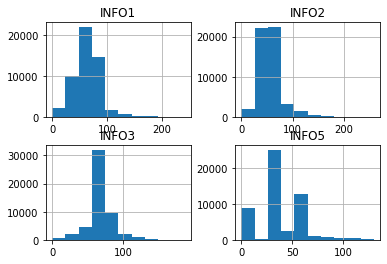

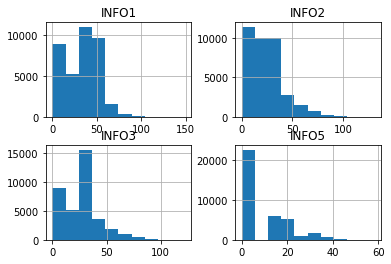

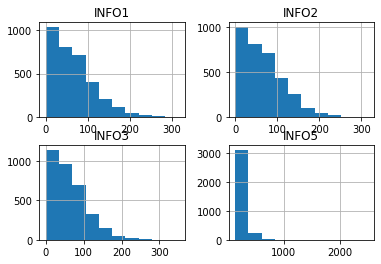

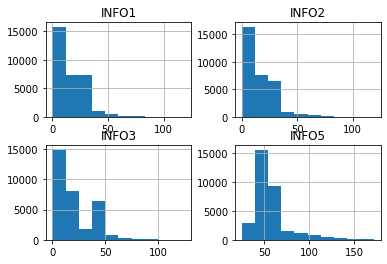

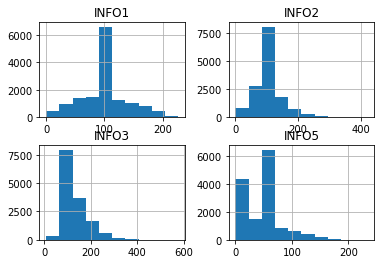

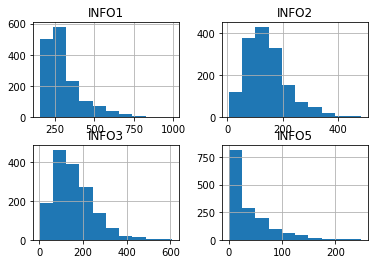

In [18]:
#Analise exploratoria individual
print('------------------------Cluster 1------------------------')
print(sep1.describe())
sep1.hist()
print('------------------------Cluster 2------------------------')
print(sep2.describe())
sep2.hist()
print('------------------------Cluster 3------------------------')
print(sep3.describe())
sep3.hist()
print('------------------------Cluster 4------------------------')
print(sep4.describe())
sep4.hist()
print('------------------------Cluster 5------------------------')
print(sep5.describe())
sep5.hist()
print('------------------------Cluster 6------------------------')
print(sep6.describe())
sep6.hist()

In [19]:
#Separando em X em y e em test/train
X1 = sep1.iloc[:, :-1].values
y1 = sep1.iloc[:, 4].values

X2 = sep2.iloc[:, :-1].values
y2 = sep2.iloc[:, 4].values

X3 = sep3.iloc[:, :-1].values
y3 = sep3.iloc[:, 4].values

X4 = sep4.iloc[:, :-1].values
y4 = sep4.iloc[:, 4].values

X5 = sep5.iloc[:, :-1].values
y5 = sep5.iloc[:, 4].values

X6 = sep6.iloc[:, :-1].values
y6 = sep6.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.25, random_state = 42)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.25, random_state = 42)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.25, random_state = 42)

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size = 0.25, random_state = 42)

X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size = 0.25, random_state = 42)

X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size = 0.25, random_state = 42)

In [20]:
#regularizando os valores
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)

X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.transform(X_test2)

X_train3 = sc.fit_transform(X_train3)
X_test3 = sc.transform(X_test3)

X_train4 = sc.fit_transform(X_train4)
X_test4 = sc.transform(X_test4)

X_train5 = sc.fit_transform(X_train5)
X_test5 = sc.transform(X_test5)

X_train6 = sc.fit_transform(X_train6)
X_test6 = sc.transform(X_test6)

In [21]:
# Usando o classificador KNN para treinar o modelo
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

clf_KNN.fit(X_train1, y_train1)
y_pred1 = clf_KNN.predict(X_test1)

clf_KNN.fit(X_train2, y_train2)
y_pred2 = clf_KNN.predict(X_test2)

clf_KNN.fit(X_train3, y_train3)
y_pred3 = clf_KNN.predict(X_test3)

clf_KNN.fit(X_train4, y_train4)
y_pred4 = clf_KNN.predict(X_test4)

clf_KNN.fit(X_train5, y_train5)
y_pred5 = clf_KNN.predict(X_test5)

clf_KNN.fit(X_train6, y_train6)
y_pred6 = clf_KNN.predict(X_test6)


#Definindo Resultado
from sklearn.metrics import confusion_matrix, accuracy_score
scoresKNN = []
scoresKNN.append(accuracy_score(y_test1, y_pred1))
scoresKNN.append(accuracy_score(y_test2, y_pred2))
scoresKNN.append(accuracy_score(y_test3, y_pred3))
scoresKNN.append(accuracy_score(y_test4, y_pred4))
scoresKNN.append(accuracy_score(y_test5, y_pred5))
scoresKNN.append(accuracy_score(y_test6, y_pred6))
scoresKNN.append(classification_report(y_test1, y_pred1))
scoresKNN.append(classification_report(y_test2, y_pred2))
scoresKNN.append(classification_report(y_test3, y_pred3))
scoresKNN.append(classification_report(y_test4, y_pred4))
scoresKNN.append(classification_report(y_test5, y_pred5))
scoresKNN.append(classification_report(y_test6, y_pred6))

for i in range(6):
  print(f'Accuracy Score {i+1}:')
  print(scoresKNN[i])
  print(f'Classification Report {i+1}:')
  print(scoresKNN[i+6])

Accuracy Score 1:
0.7371213286175611
Classification Report 1:
                           precision    recall  f1-score   support

                400m walk       0.38      0.71      0.50       956
       Carrying groceries       0.21      0.29      0.25       157
        Crossword puzzles       0.03      0.04      0.03        26
                  Dusting       0.71      0.76      0.73      1879
                Gardening       0.84      0.83      0.83      1950
                  Laundry       0.13      0.10      0.11       377
      Organizing the room       0.88      0.80      0.84      1934
            Playing cards       0.24      0.14      0.17       180
Self-care (miscellaneous)       0.90      0.81      0.85      1858
        Simulated Bowling       0.88      0.81      0.84      1649
      Slow walk (1.8 mph)       0.38      0.21      0.27       140
                  Tai-chi       0.20      0.06      0.10       110
                Vacuuming       0.83      0.76      0.79      1790

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
# Usando o classificador Random Forest para treinar o modelo
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators = 60, criterion = 'entropy', random_state = 42)

clf_rf.fit(X_train1, y_train1)
y_pred1 = clf_rf.predict(X_test1)

clf_rf.fit(X_train2, y_train2)
y_pred2 = clf_rf.predict(X_test2)

clf_rf.fit(X_train3, y_train3)
y_pred3 = clf_rf.predict(X_test3)

clf_rf.fit(X_train4, y_train4)
y_pred4 = clf_rf.predict(X_test4)

clf_rf.fit(X_train5, y_train5)
y_pred5 = clf_rf.predict(X_test5)

clf_rf.fit(X_train6, y_train6)
y_pred6 = clf_rf.predict(X_test6)


#Definindo Resultado
from sklearn.metrics import confusion_matrix, accuracy_score
scoresRF = []
scoresRF.append(accuracy_score(y_test1, y_pred1))
scoresRF.append(accuracy_score(y_test2, y_pred2))
scoresRF.append(accuracy_score(y_test3, y_pred3))
scoresRF.append(accuracy_score(y_test4, y_pred4))
scoresRF.append(accuracy_score(y_test5, y_pred5))
scoresRF.append(accuracy_score(y_test6, y_pred6))
scoresRF.append(classification_report(y_test1, y_pred1))
scoresRF.append(classification_report(y_test2, y_pred2))
scoresRF.append(classification_report(y_test3, y_pred3))
scoresRF.append(classification_report(y_test4, y_pred4))
scoresRF.append(classification_report(y_test5, y_pred5))
scoresRF.append(classification_report(y_test6, y_pred6))

for i in range(6):
  print(f'Accuracy Score {i+1}:')
  print(scoresRF[i])
  print(f'Classification Report {i+1}:')
  print(scoresRF[i+6])

Accuracy Score 1:
0.7370444410272182
Classification Report 1:
                           precision    recall  f1-score   support

                400m walk       0.44      0.64      0.52       956
       Carrying groceries       0.32      0.31      0.32       157
        Crossword puzzles       0.00      0.00      0.00        26
                  Dusting       0.73      0.75      0.74      1879
                Gardening       0.82      0.83      0.83      1950
                  Laundry       0.13      0.11      0.12       377
      Organizing the room       0.86      0.79      0.82      1934
            Playing cards       0.24      0.18      0.20       180
Self-care (miscellaneous)       0.87      0.81      0.84      1858
        Simulated Bowling       0.84      0.82      0.83      1649
      Slow walk (1.8 mph)       0.38      0.25      0.30       140
                  Tai-chi       0.20      0.17      0.19       110
                Vacuuming       0.78      0.77      0.77      1790

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
# Usando o classificador SVM para treinar o modelo
from sklearn.svm import SVC
clf_SVM = SVC(kernel = 'linear', random_state = 42)

clf_SVM.fit(X_train1, y_train1)
y_pred1 = clf_SVM.predict(X_test1)

clf_SVM.fit(X_train2, y_train2)
y_pred2 = clf_SVM.predict(X_test2)

clf_SVM.fit(X_train3, y_train3)
y_pred3 = clf_SVM.predict(X_test3)

clf_SVM.fit(X_train4, y_train4)
y_pred4 = clf_SVM.predict(X_test4)

clf_SVM.fit(X_train5, y_train5)
y_pred5 = clf_SVM.predict(X_test5)

clf_SVM.fit(X_train6, y_train6)
y_pred6 = clf_SVM.predict(X_test6)


#Definindo Resultado
from sklearn.metrics import confusion_matrix, accuracy_score
scoresSVM = []
scoresSVM.append(accuracy_score(y_test1, y_pred1))
scoresSVM.append(accuracy_score(y_test2, y_pred2))
scoresSVM.append(accuracy_score(y_test3, y_pred3))
scoresSVM.append(accuracy_score(y_test4, y_pred4))
scoresSVM.append(accuracy_score(y_test5, y_pred5))
scoresSVM.append(accuracy_score(y_test6, y_pred6))
scoresSVM.append(classification_report(y_test1, y_pred1))
scoresSVM.append(classification_report(y_test2, y_pred2))
scoresSVM.append(classification_report(y_test3, y_pred3))
scoresSVM.append(classification_report(y_test4, y_pred4))
scoresSVM.append(classification_report(y_test5, y_pred5))
scoresSVM.append(classification_report(y_test6, y_pred6))

for i in range(6):
  print(f'Accuracy Score {i+1}:')
  print(scoresSVM[i])
  print(f'Classification Report {i+1}:')
  print(scoresSVM[i+6])

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score 1:
0.6223281562355836
Classification Report 1:
                           precision    recall  f1-score   support

                400m walk       0.37      0.56      0.45       956
       Carrying groceries       0.12      0.04      0.06       157
        Crossword puzzles       0.00      0.00      0.00        26
                  Dusting       0.14      0.00      0.01      1879
                Gardening       0.47      0.85      0.61      1950
                  Laundry       0.00      0.00      0.00       377
      Organizing the room       0.82      0.81      0.82      1934
            Playing cards       0.00      0.00      0.00       180
Self-care (miscellaneous)       0.71      0.84      0.77      1858
        Simulated Bowling       0.70      0.83      0.76      1649
      Slow walk (1.8 mph)       0.00      0.00      0.00       140
                  Tai-chi       0.00      0.00      0.00       110
                Vacuuming       0.73      0.78      0.75      1790

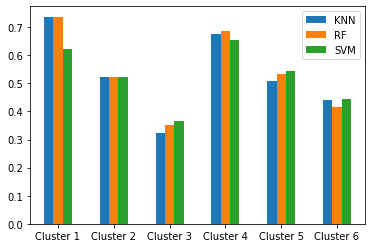

In [30]:
#Grafico usando apenas a acuracia, pouco seguro
acuracia_KNN = [scoresKNN[0],scoresKNN[1],scoresKNN[2],scoresKNN[3],scoresKNN[4],scoresKNN[5]]
acuracia_RF = [scoresRF[0],scoresRF[1],scoresRF[2],scoresRF[3],scoresRF[4],scoresRF[5]]
acuracia_SVM = [scoresSVM[0],scoresSVM[1],scoresSVM[2],scoresSVM[3],scoresSVM[4],scoresSVM[5]]
plotFrame = pd.DataFrame({
    'KNN':acuracia_KNN,
    'RF':acuracia_RF,
    'SVM':acuracia_SVM,
},index=['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6'])
ax = plotFrame.plot.bar(rot=0)